# POSTTEST 5
##### NAMA : FRANSISKUS ANDRE
##### NIM  : 2009106065

# IMPORT LIBRARY

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import matplotlib.pyplot as plt

# Read Data

In [4]:
# from google.colab import drive
# drive.mount('/content/drive')

In [5]:
#df = pd.read_csv('/content/drive/MyDrive/breast-cancer.csv')

In [6]:
df = pd.read_csv('breast-cancer.csv')

In [7]:
df.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


# EDA

In [8]:
df.shape #Untuk melihat jumlah rekord data dan jumlah kolom

(569, 32)

In [9]:
df.columns #Untuk Melihat kolom apa saja yang ada dalam data set

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [10]:
df.describe()# Untuk melihat nilai maksimal,standar devisasi,nilai rata-rata,minimal,maksimal,q1,q2,q3

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [11]:
df.dtypes #Untuk Melihat tipe data apa saja yang ada pada kolom dataset

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

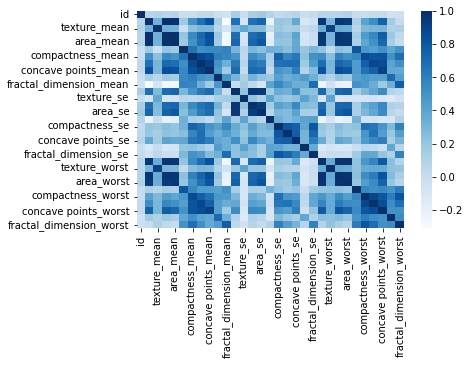

In [12]:
sns.heatmap(df.corr(), cmap = "Blues" ) #Untuk melihat korelasi antar kolom

# DATA PREPOCESSING

##Transformasi Data

In [13]:
df['diagnosis']=df['diagnosis'].replace(['M', 'B'],[1,0])#mentranformasi data 

## STANDARISASI DATA

#### Membuat variabel  untuk normalisasi data

In [14]:
std_scaler = MinMaxScaler()

#### Standrarisasi data dan menampilkan hasil standarisasi

In [15]:
standarisasi = std_scaler.fit_transform(df[df.columns.difference(['id','diagnosis'])])
df[df.columns.difference(['id','diagnosis'])] = standarisasi
print("Nilai standar deviasi setelah scaling:", np.nanstd(standarisasi))


Nilai standar deviasi setelah scaling: 0.17348256525794975


In [16]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,842517,1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,84300903,1,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,84348301,1,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,84358402,1,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,1,0.690000,0.428813,0.678668,0.566490,0.526948,0.296055,0.571462,0.690358,...,0.623266,0.383262,0.576174,0.452664,0.461137,0.178527,0.328035,0.761512,0.097575,0.105667
565,926682,1,0.622320,0.626987,0.604036,0.474019,0.407782,0.257714,0.337395,0.486630,...,0.560655,0.699094,0.520892,0.379915,0.300007,0.159997,0.256789,0.559450,0.198502,0.074315
566,926954,1,0.455251,0.621238,0.445788,0.303118,0.288165,0.254340,0.216753,0.263519,...,0.393099,0.589019,0.379949,0.230731,0.282177,0.273705,0.271805,0.487285,0.128721,0.151909
567,927241,1,0.644564,0.663510,0.665538,0.475716,0.588336,0.790197,0.823336,0.755467,...,0.633582,0.730277,0.668310,0.402035,0.619626,0.815758,0.749760,0.910653,0.497142,0.452315


# DATA MODELING


In [17]:
df.isna().sum()#Umtuk melihat nilai NULL


id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

### Membuat Model

In [18]:
X = df[['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']]##data
Y = df['diagnosis']##label

In [99]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,random_state = True, test_size=.2)#Membagi data untuk data traininf dan data testing

### NAIVE BAYES

In [100]:
classifier = GaussianNB()#membuat variabel untuk klasifikasi

In [101]:
classifier.fit(x_train,y_train)#melatih data


GaussianNB()

In [102]:
classifier.score(x_test, y_test)

0.9473684210526315

In [103]:
predicted_value = classifier.predict(x_test)#prediksi data
accuracy = accuracy_score(y_test,predicted_value)#akurasi data

In [104]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

print(classification_report(y_test,predicted_value))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96        72
           1       0.95      0.90      0.93        42

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



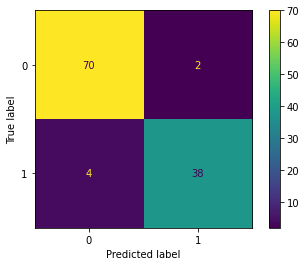

In [105]:
ConfusionMatrixDisplay.from_predictions(y_test, predicted_value)

## KNN

In [106]:
classifier = KNeighborsClassifier(n_neighbors = 3, metric = 'manhattan')#variabel untuk klasifiaksit

In [107]:
classifier.fit(x_train,y_train)#melatih data

KNeighborsClassifier(metric='manhattan', n_neighbors=3)

In [108]:
classifier.score(x_test, y_test)#score hasil klasifikasi

0.9473684210526315

In [109]:
predicted_value = classifier.predict(x_test)#prediksi data
accuracy = accuracy_score(y_test,predicted_value)#akurasi data

In [110]:
from sklearn.metrics import classification_report

print(classification_report(y_test,predicted_value))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96        72
           1       0.97      0.88      0.93        42

    accuracy                           0.95       114
   macro avg       0.95      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



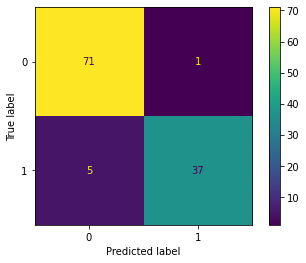

In [111]:
ConfusionMatrixDisplay.from_predictions(y_test, predicted_value)

## SVM

In [112]:
svc = SVC(kernel = 'linear')
svc.fit(x_train,y_train)


SVC(kernel='linear')

In [113]:
predicted_value = svc.predict(x_test)#prediksi data
accuracy = accuracy_score(y_test,predicted_value)#akurasi data

In [114]:
svc.score(x_test, y_test)#score hasil klasifikasi

0.9736842105263158

In [115]:
from sklearn.metrics import classification_report

print(classification_report(y_test,predicted_value))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        72
           1       1.00      0.93      0.96        42

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114



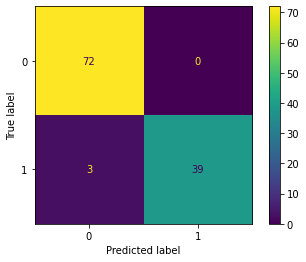

In [116]:
ConfusionMatrixDisplay.from_predictions(y_test, predicted_value)

## Mengkonversi hasil prediksi

In [117]:
hasil = pd.concat([x_test.reset_index(drop = True),pd.Series(predicted_value)],axis = 1)

In [118]:
hasil

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,0
0,0.364854,0.144403,0.376132,0.217434,0.455629,0.503711,0.339738,0.313121,0.518182,0.507582,...,0.168443,0.317197,0.153362,0.396421,0.326193,0.257109,0.380756,0.248768,0.242949,0
1,0.292915,0.302672,0.291549,0.165896,0.570281,0.318140,0.287254,0.364811,0.539394,0.375105,...,0.424574,0.260919,0.141123,0.709437,0.377711,0.399840,0.717526,0.460280,0.412305,1
2,0.282503,0.213392,0.271923,0.157031,0.432157,0.184191,0.144213,0.167495,0.338384,0.310447,...,0.210821,0.191245,0.098358,0.509344,0.174162,0.178994,0.362887,0.357776,0.267611,0
3,0.536182,0.299966,0.516965,0.380700,0.300172,0.200294,0.191401,0.288966,0.283333,0.090354,...,0.382196,0.442203,0.301022,0.344912,0.210738,0.282588,0.539863,0.323477,0.094057,1
4,0.385678,0.679743,0.365697,0.244327,0.275977,0.081805,0.109794,0.136133,0.400000,0.062763,...,0.663380,0.297276,0.183396,0.288120,0.069244,0.123562,0.225945,0.328800,0.043356,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,0.401297,0.073723,0.405708,0.251707,0.659655,0.417520,0.476101,0.545229,0.457576,0.436605,...,0.133795,0.371483,0.225324,0.541042,0.321148,0.465655,0.627835,0.325448,0.301456,1
110,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,...,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711,1
111,0.096928,0.257694,0.103656,0.045387,0.487226,0.373965,0.733365,0.217445,0.530808,0.642376,...,0.283316,0.075153,0.034285,0.508684,0.397018,1.000000,0.601375,0.524936,0.409681,0
112,0.357281,0.325668,0.348697,0.218961,0.282116,0.179805,0.206584,0.145378,0.208586,0.157961,...,0.436301,0.287315,0.158597,0.249158,0.230530,0.301837,0.329691,0.178593,0.128493,0


In [119]:
hasil.to_csv("hasil_prediksi.csv",index = False)

In [120]:
df_hasil = pd.read_csv("hasil_prediksi.csv")

In [121]:
df_hasil.rename(columns={df_hasil.columns[-1]: 'prediksi'}, inplace=True)

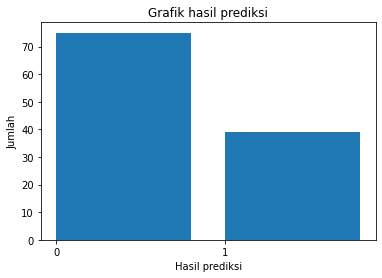

In [122]:
plt.bar(df_hasil['prediksi'].unique(), df_hasil['prediksi'].value_counts(), align = 'edge')
plt.xticks(df_hasil['prediksi'].unique())
plt.xlabel("Hasil prediksi") 
plt.ylabel("Jumlah") 
plt.title("Grafik hasil prediksi") 
plt.show() 

In [123]:
df_hasil.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,prediksi
0,0.364854,0.144403,0.376132,0.217434,0.455629,0.503711,0.339738,0.313121,0.518182,0.507582,...,0.168443,0.317197,0.153362,0.396421,0.326193,0.257109,0.380756,0.248768,0.242949,0
1,0.292915,0.302672,0.291549,0.165896,0.570281,0.318140,0.287254,0.364811,0.539394,0.375105,...,0.424574,0.260919,0.141123,0.709437,0.377711,0.399840,0.717526,0.460280,0.412305,1
2,0.282503,0.213392,0.271923,0.157031,0.432157,0.184191,0.144213,0.167495,0.338384,0.310447,...,0.210821,0.191245,0.098358,0.509344,0.174162,0.178994,0.362887,0.357776,0.267611,0
3,0.536182,0.299966,0.516965,0.380700,0.300172,0.200294,0.191401,0.288966,0.283333,0.090354,...,0.382196,0.442203,0.301022,0.344912,0.210738,0.282588,0.539863,0.323477,0.094057,1
4,0.385678,0.679743,0.365697,0.244327,0.275977,0.081805,0.109794,0.136133,0.400000,0.062763,...,0.663380,0.297276,0.183396,0.288120,0.069244,0.123562,0.225945,0.328800,0.043356,1


# Menghitung akurasi ketepatan membagi data 

## Model SVM

In [124]:
split = [0.1]
list_of_score = []
for i in split:
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=i)
    model = SVC(kernel = 'linear')
    model.fit(X_train, y_train)
    list_of_score.append(model.score(X_test, y_test))
    print(list_of_score)

[0.9824561403508771]


In [125]:
split = [0.2]
list_of_score = []
for i in split:
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=i)
    model = SVC(kernel = 'linear')
    model.fit(X_train, y_train)
    list_of_score.append(model.score(X_test, y_test))
    print(list_of_score)

[0.9736842105263158]


In [126]:
split = [0.3]
list_of_score = []
for i in split:
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=i)
    model = SVC(kernel = 'linear')
    model.fit(X_train, y_train)
    list_of_score.append(model.score(X_test, y_test))
    print(list_of_score)

[0.9707602339181286]


In [127]:
split = [0.4]
list_of_score = []
for i in split:
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=i)
    model = SVC(kernel = 'linear')
    model.fit(X_train, y_train)
    list_of_score.append(model.score(X_test, y_test))
    print(list_of_score)

[0.9605263157894737]


## Model Naive Bayes

In [128]:
split = [0.1]
list_of_score = []
for i in split:
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=i)
    model = GaussianNB()
    model.fit(X_train, y_train)
    list_of_score.append(model.score(X_test, y_test))
    print(list_of_score)

[0.9298245614035088]


In [129]:
split = [0.2]
list_of_score = []
for i in split:
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=i)
    model = GaussianNB()
    model.fit(X_train, y_train)
    list_of_score.append(model.score(X_test, y_test))
    print(list_of_score)

[0.956140350877193]


In [130]:
split = [0.3]
list_of_score = []
for i in split:
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=i)
    model = GaussianNB()
    model.fit(X_train, y_train)
    list_of_score.append(model.score(X_test, y_test))
    print(list_of_score)

[0.935672514619883]


In [131]:
split = [0.4]
list_of_score = []
for i in split:
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=i)
    model = GaussianNB()
    model.fit(X_train, y_train)
    list_of_score.append(model.score(X_test, y_test))
    print(list_of_score)

[0.9429824561403509]
